<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/Visualizing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualizing imputed dataset (imputed by crude backfillingb

In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
%cd "/gdrive/My Drive/tensor-flow-state/tensor-flow-state"

/gdrive/My Drive/tensor-flow-state/tensor-flow-state


In [0]:
import pandas as pd
df = pd.read_csv("data/df_imputed_4week_shift.csv", index_col = 0, parse_dates = True)

In [0]:
import numpy as np
def resample_df(df, freq = "D", method_speed = np.mean, method_flow = np.sum):
    copied = df.resample(freq).agg({
           "speed": method_speed, "speed_-2": method_speed, "speed_-1": method_speed, "speed_+1": method_speed, "speed_+2": method_speed,
           "flow": method_flow, "flow_-2": method_flow, "flow_-1": method_flow, "flow_+1": method_flow, "flow_+2": method_flow})
    return copied

In [0]:
df_D =  resample_df(df, method_speed = pd.Series.mode)

In [74]:
df_D.astype({'speed': 'int32'})

ValueError: ignored

In [61]:
df_D.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3283 entries, 2011-01-03 to 2019-12-29
Freq: D
Data columns (total 10 columns):
speed       3283 non-null object
speed_-2    3283 non-null object
speed_-1    3283 non-null object
speed_+1    3283 non-null object
speed_+2    3283 non-null object
flow        3283 non-null float64
flow_-2     3283 non-null float64
flow_-1     3283 non-null float64
flow_+1     3283 non-null float64
flow_+2     3283 non-null float64
dtypes: float64(5), object(5)
memory usage: 442.1+ KB


TypeError: ignored

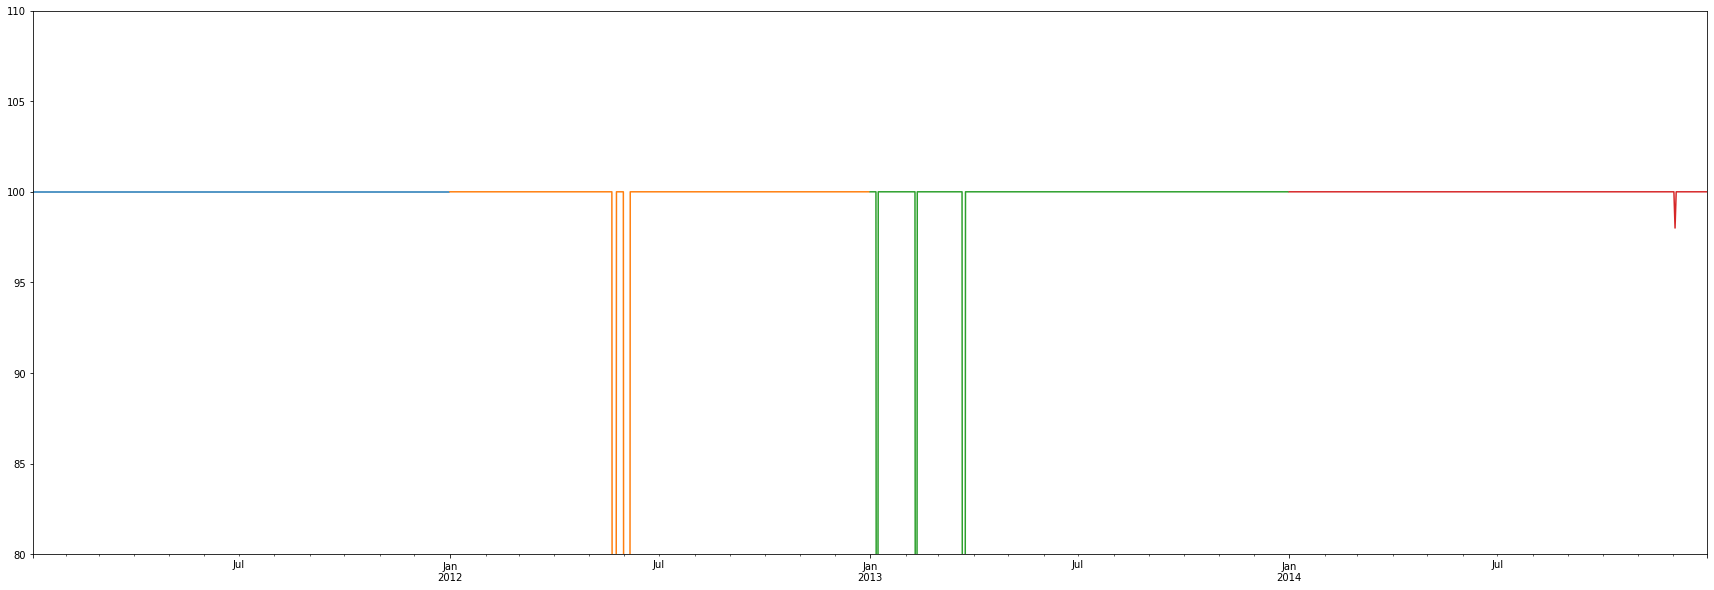

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (30, 10), sharey = True)
ax.set_ylim(80, 110)
for i, year in enumerate(range(2011, 2020)):
    df_D[df_D.index.year == year]['speed'].plot(ax = ax)

In [18]:
for i in range(2011, 2019):
    print(i)

2011
2012
2013
2014
2015
2016
2017
2018


In [48]:
import scipy.stats
scipy.stats.mode([0,1,1,2])[0]

array([1])

In [0]:
resamp = resample_df(df, freq = "W", method_speed = np.mean, method_flow = np.sum)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (30,15))
resamp[speed_cols].plot(ax = ax)

In [0]:
def missing_per_month(df):
    df["null"] = np.where(df.speed.isna(), 1, np.nan)
    df["timestamp"] = df.index
    df.groupby(pd.Grouper(key="timestamp", freq="M"))["null"].sum()
missing_per_month(df)